# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress
import time

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

611

In [5]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4636927cdcc9c1553cd45838b21f1205


In [7]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + "i"

In [8]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | peniche
Processing Record 2 of Set 13 | nizhneyansk
City not found. Skipping...
Processing Record 3 of Set 13 | kyra
Processing Record 4 of Set 13 | mahebourg
Processing Record 5 of Set 13 | pangkalanbuun
Processing Record 6 of Set 13 | bredasdorp
Processing Record 7 of Set 13 | vardo
Processing Record 8 of Set 13 | port elizabeth
Processing Record 9 of Set 13 | belushya guba
City not found. Skipping...
Processing Record 10 of Set 13 | ushuaia
Processing Record 11 of Set 13 | basoko
Processing Record 12 of Set 13 | sao joao da barra
Processing Record 13 of Set 13 | niquelandia
Processing Record 14 of Set 13 | yulara
Processing Record 15 of Set 13 | puerto ayora
Processing Record 16 of Set 13 | touros
Processing Record 17 of Set 13 | rikitea
Processing Record 18 of Set 13 | hithadhoo
Processing Record 19 of Set 13 | borogontsy
Processing Record 20 of Set 13 | dingle
Processing Record 21 of Set 13 | vaitupu
City not found. Skipping...
Processing Record 22 

Processing Record 34 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 35 of Set 16 | raquira
Processing Record 36 of Set 16 | maneadero
Processing Record 37 of Set 16 | qaanaaq
Processing Record 38 of Set 16 | biak
Processing Record 39 of Set 16 | saint-philippe
Processing Record 40 of Set 16 | meadow lake
Processing Record 41 of Set 16 | cairns
Processing Record 42 of Set 16 | maydolong
Processing Record 43 of Set 16 | torbay
Processing Record 44 of Set 16 | clyde river
Processing Record 45 of Set 16 | datong
Processing Record 46 of Set 16 | grand baie
Processing Record 47 of Set 16 | tiksi
Processing Record 48 of Set 16 | tongzi
Processing Record 49 of Set 16 | rio gallegos
Processing Record 50 of Set 16 | butaritari
Processing Record 1 of Set 17 | ulladulla
Processing Record 2 of Set 17 | kampen
Processing Record 3 of Set 17 | boda
Processing Record 4 of Set 17 | kununurra
Processing Record 5 of Set 17 | saint george
Processing Record 6 of Set 17 | saint-augustin

Processing Record 22 of Set 20 | hamburg
Processing Record 23 of Set 20 | tiznit
Processing Record 24 of Set 20 | ulaanbaatar
Processing Record 25 of Set 20 | tsihombe
City not found. Skipping...
Processing Record 26 of Set 20 | hanzhong
Processing Record 27 of Set 20 | ilebo
Processing Record 28 of Set 20 | louisbourg
City not found. Skipping...
Processing Record 29 of Set 20 | nanortalik
Processing Record 30 of Set 20 | ha giang
Processing Record 31 of Set 20 | bonavista
Processing Record 32 of Set 20 | linkuva
Processing Record 33 of Set 20 | skibbereen
Processing Record 34 of Set 20 | saleaula
City not found. Skipping...
Processing Record 35 of Set 20 | namibe
Processing Record 36 of Set 20 | tara
Processing Record 37 of Set 20 | amersham
Processing Record 38 of Set 20 | urumqi
Processing Record 39 of Set 20 | penzance
Processing Record 40 of Set 20 | salinas
Processing Record 41 of Set 20 | waitati
Processing Record 42 of Set 20 | kasongo-lunda
Processing Record 43 of Set 20 | her

Processing Record 10 of Set 24 | umea
Processing Record 11 of Set 24 | jiayuguan
Processing Record 12 of Set 24 | tanete
Processing Record 13 of Set 24 | papetoai
Processing Record 14 of Set 24 | salta
Processing Record 15 of Set 24 | boz
Processing Record 16 of Set 24 | payo
Processing Record 17 of Set 24 | porto novo
Processing Record 18 of Set 24 | requena
Processing Record 19 of Set 24 | hitachi
Processing Record 20 of Set 24 | castro verde
Processing Record 21 of Set 24 | tagusao
Processing Record 22 of Set 24 | manicore
Processing Record 23 of Set 24 | lima
Processing Record 24 of Set 24 | usinsk
Processing Record 25 of Set 24 | palkino
Processing Record 26 of Set 24 | sorland
Processing Record 27 of Set 24 | uwayl
City not found. Skipping...
Processing Record 28 of Set 24 | cap malheureux
Processing Record 29 of Set 24 | alice springs
Processing Record 30 of Set 24 | tupelo
Processing Record 31 of Set 24 | burns lake
Processing Record 32 of Set 24 | khonuu
City not found. Skippi

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Peniche,39.36,-9.38,62.01,88,97,10.00,PT,2020-10-28 00:18:41
1,Kyra,49.58,111.98,25.97,84,27,2.08,RU,2020-10-28 00:18:41
2,Mahebourg,-20.41,57.70,70.00,80,3,1.99,MU,2020-10-28 00:10:56
3,Pangkalanbuun,-2.68,111.62,77.77,89,100,1.41,ID,2020-10-28 00:14:53
4,Bredasdorp,-34.53,20.04,62.60,82,100,4.70,ZA,2020-10-28 00:10:16
5,Vardo,70.37,31.11,43.43,93,100,11.72,NO,2020-10-28 00:06:44
6,Port Elizabeth,-33.92,25.57,62.60,82,0,19.46,ZA,2020-10-28 00:14:25
7,Ushuaia,-54.80,-68.30,46.40,39,40,8.05,AR,2020-10-28 00:10:14
8,Basoko,1.24,23.62,72.64,93,95,1.74,CD,2020-10-28 00:18:42
9,Sao Joao Da Barra,-21.64,-41.05,74.52,89,71,15.28,BR,2020-10-28 00:10:17


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Peniche,PT,2020-10-28 00:18:41,39.36,-9.38,62.01,88,97,10.00
1,Kyra,RU,2020-10-28 00:18:41,49.58,111.98,25.97,84,27,2.08
2,Mahebourg,MU,2020-10-28 00:10:56,-20.41,57.70,70.00,80,3,1.99
3,Pangkalanbuun,ID,2020-10-28 00:14:53,-2.68,111.62,77.77,89,100,1.41
4,Bredasdorp,ZA,2020-10-28 00:10:16,-34.53,20.04,62.60,82,100,4.70
...,...,...,...,...,...,...,...,...,...
561,Marawi,PH,2020-10-28 00:11:29,8.00,124.29,81.00,83,97,1.99
562,Muisne,EC,2020-10-28 00:10:17,0.60,-80.03,74.12,86,100,11.95
563,Tuatapere,NZ,2020-10-28 00:10:15,-46.13,167.68,57.99,67,35,3.00
564,Conde,BR,2020-10-28 00:19:50,-7.26,-34.91,78.80,78,20,9.17


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [13]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1603844390.6072228

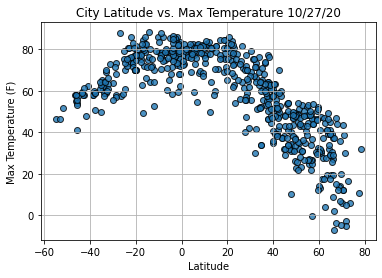

In [14]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

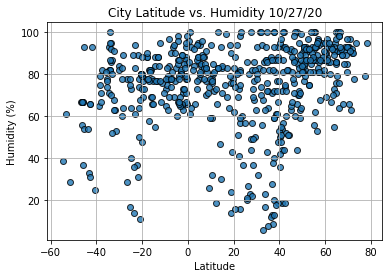

In [15]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

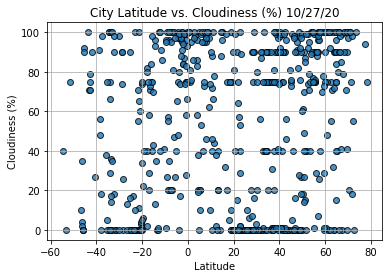

In [16]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

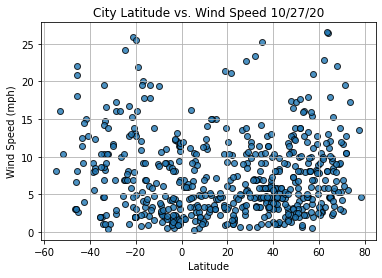

In [17]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [18]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [53]:
index13 = city_data_df.loc[13]

In [54]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

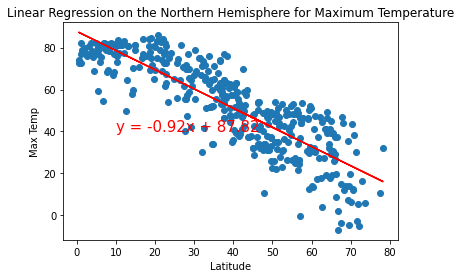

In [55]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

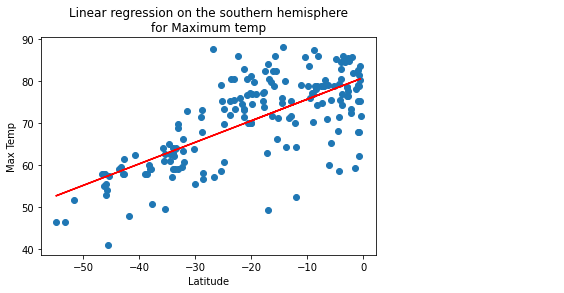

In [56]:
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
plot_linear_regression(x_values, y_values, 
                       'Linear regression on the southern hemisphere\nfor Maximum temp', 'Max Temp', (10,40))

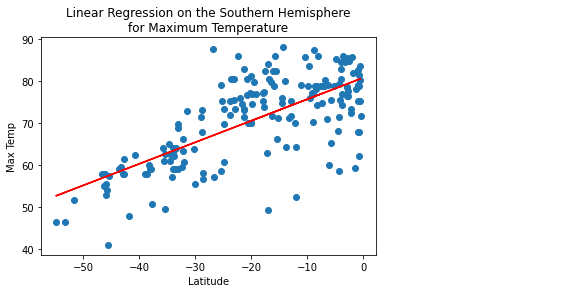

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(10,40))

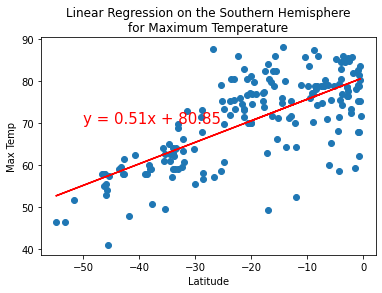

In [77]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,70))

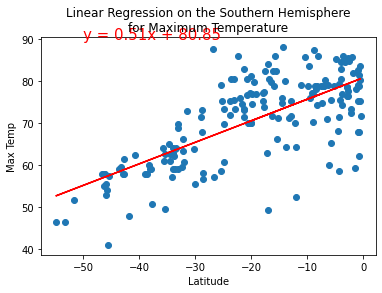

In [62]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\nfor Maximum Temperature', 'Max Temp',(-50,90))

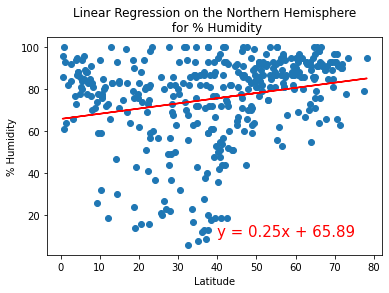

In [76]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for % Humidity', '% Humidity',(40,10))

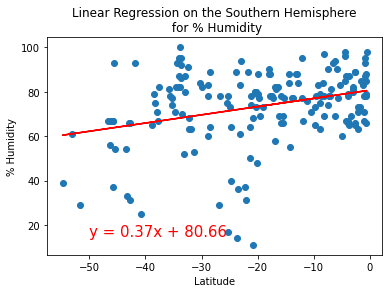

In [75]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

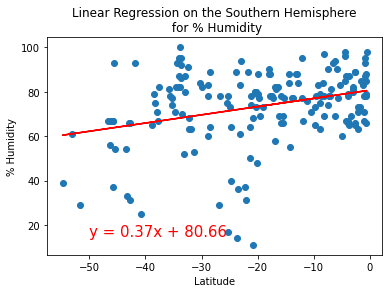

In [74]:
# Linear regression on the Southern Hemisphere
plt.title(f"Linear Regression on the Southern Hemisphere for % Humidity")
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Humidity', '% Humidity',(-50,15))

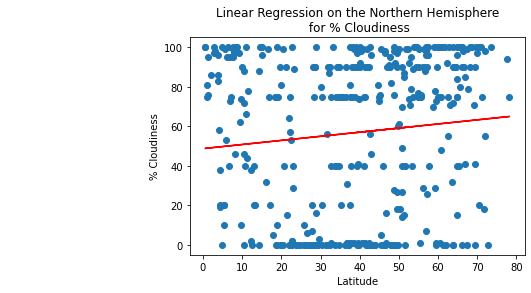

In [73]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,15))


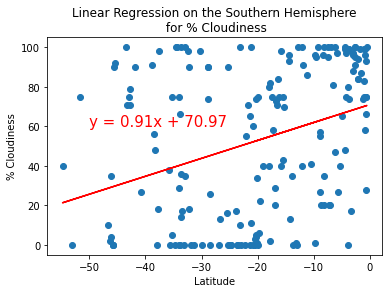

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for % Cloudiness', '% Cloudiness',(-50,60))

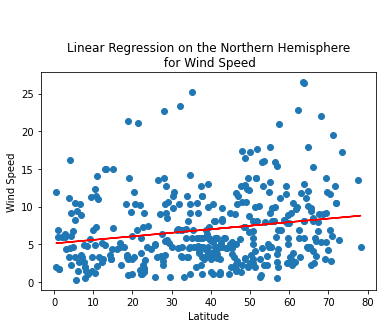

In [71]:
#Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\n for Wind Speed', 'Wind Speed',(40,35))

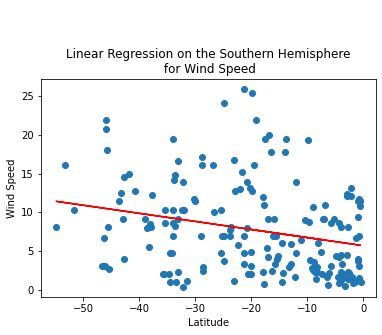

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere\n for Wind Speed', 'Wind Speed',(-50,35))